In [1]:
import pandas as pd
import numpy as np

In [19]:
# clean and write data to csv
cv = pd.read_csv('covid_data_raw.csv')
cv = cv[(cv["continent"]=="Europe") & (cv["indicator"] == "cases")]
cv.drop(["population", "country_code", "source", "rate_14_day", "cumulative_count", "indicator", "continent"], inplace=True, axis=1)

,country,weekly_count,year_week
376,Albania,2,2020-10
377,Albania,40,2020-11
378,Albania,47,2020-12
379,Albania,123,2020-13
380,Albania,149,2020-14


In [24]:
week_to_month = [
    "01","01","01","01","01",
    "02","02","02","02",
    "03","03","03","03",
    "04","04","04","04","04",
    "05","05","05","05",
    "06","06","06","06","06",
    "07","07","07","07",
    "08","08","08","08","08",
    "09","09","09","09",
    "10","10","10","10","10",
    "11","11","11","11",
    "12","12","12","12","12"]

cv["year_month"] = cv["year_week"].apply(lambda x: x[:5] + week_to_month[int(x[5:])])

              country  weekly_count year_week year_month
376           Albania             2   2020-10    2020-03
377           Albania            40   2020-11    2020-03
378           Albania            47   2020-12    2020-03
379           Albania           123   2020-13    2020-04
380           Albania           149   2020-14    2020-04
...               ...           ...       ...        ...
35763  United Kingdom        203470   2021-37    2021-09
35764  United Kingdom        234484   2021-38    2021-09
35765  United Kingdom        236450   2021-39    2021-09
35766  United Kingdom        293089   2021-40    2021-10
35767  United Kingdom        255396   2021-41    2021-10

[5113 rows x 4 columns]


In [25]:
cv.to_csv("covid_data.csv", index=False)
cv.head()

,country,weekly_count,year_week,year_month
376,Albania,2,2020-10,2020-03
377,Albania,40,2020-11,2020-03
378,Albania,47,2020-12,2020-03
379,Albania,123,2020-13,2020-04
380,Albania,149,2020-14,2020-04


In [36]:
gby = cv.groupby(["country", "year_month"]).sum().add_suffix('').reset_index()
gby.columns = ["country", "year_month", "month_count"]
gby.to_csv("covid_data_month.csv", index=False)
gby.head()

,country,year_month,monthly_count
0,Albania,2020-03,89
1,Albania,2020-04,637
2,Albania,2020-05,272
3,Albania,2020-06,1404
4,Albania,2020-07,2361


<AxesSubplot:xlabel='year_month'>

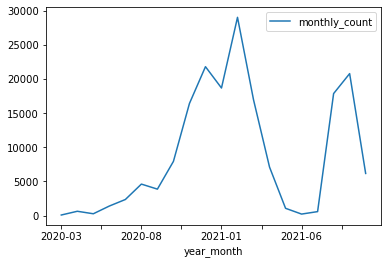

In [39]:
gby[gby["country"]=="Albania"].plot(x="year_month", y="monthly_count", kind="line")